In [119]:
import pystan
import pandas as pd
import arviz
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8.0, 8.0]

### 4.26 - 4.36

## Read data

In [64]:
df = pd.read_csv('data/howell1.csv', sep=';')

In [65]:
df = df[df.age>18]

## Model Definition

In [54]:
# Define model
model = """
data {
    int<lower=0> N;
    vector[N] height;
}
parameters {
    real mu;
    real<lower=0, upper=50> sigma;
}
model {
    mu ~ normal(178, 20);
    height ~ normal(mu, sigma);
}
"""

In [49]:
data = {
    'N': len(df['height']),
    'height': df['height']
}

In [50]:
sm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c60e6f73bf8a0fd0ab0db41f3e7fb3d7 NOW.


In [51]:
fit = sm.sampling(data=data, iter=1000, chains=4, warmup=500)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C96124FB48>,
      dtype=object)

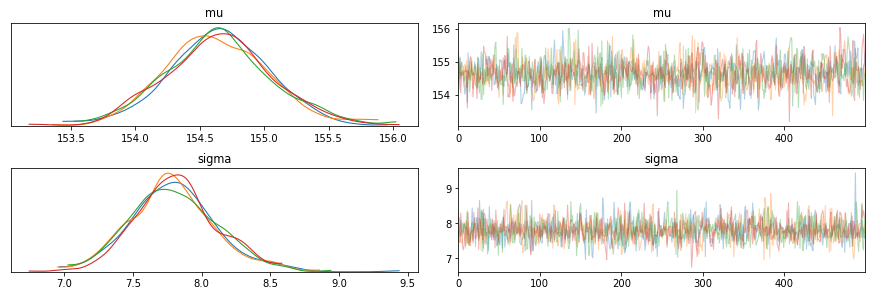

In [52]:
arviz.plot_trace(fit)

In [58]:
np.cov([fit['mu'], fit['sigma']])

array([[ 0.17129739, -0.00224779],
       [-0.00224779,  0.09356564]])

In [59]:
np.corrcoef([fit['mu'], fit['sigma']])

array([[ 1.        , -0.01775506],
       [-0.01775506,  1.        ]])

### 4.37 - 

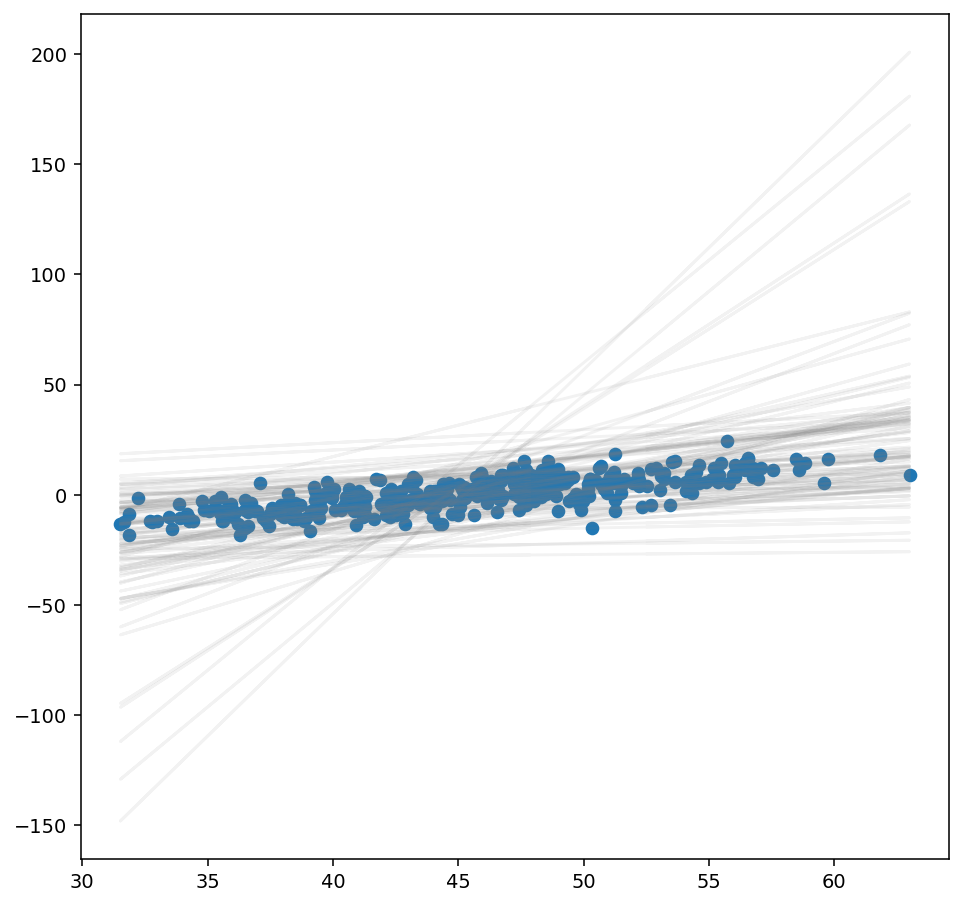

In [121]:
alphas = np.random.normal(loc=0, scale=10, size=100)
betas = np.random.lognormal(mean=0, sigma=1, size=100)
for i in np.arange(100):
    plt.plot(df.weight, alphas[i] + betas[i]*(df.weight - np.mean(df.weight)), color = 'gray', alpha=0.1)
plt.scatter(df.weight, df.height-np.mean(df.height))

In [93]:
model = """
data {
    int<lower=0> N;
    vector[N] height;
    vector[N] weight;
}
parameters {
    real alpha;
    real beta;
    real<lower=0, upper=50> sigma;
}
model {
    alpha ~ normal(0, 10);
    beta ~ normal(0, 5);
    height ~ normal(alpha + beta*(weight - mean(weight)), sigma);
}
"""

In [80]:
data = {
    'N': len(df.height),
    'weight': df.weight,
    'height': df.height
}

In [94]:
sm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_95ce58ef7442926ff2ed78a7695669ef NOW.


In [95]:
fit = sm.sampling(data=data, iter=1000, chains=4, warmup=500)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C96384D388>,
      dtype=object)

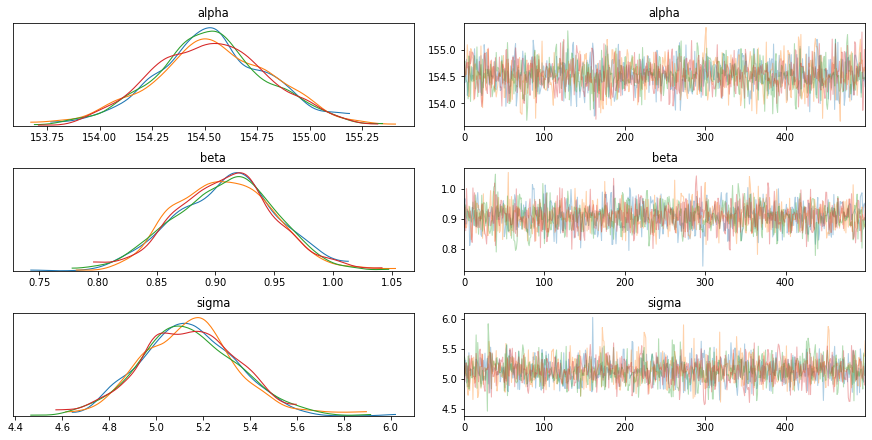

In [96]:
arviz.plot_trace(fit)

In [97]:
fit

Inference for Stan model: anon_model_95ce58ef7442926ff2ed78a7695669ef.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha 154.53  6.4e-3   0.27 153.98 154.35 154.53 154.71 155.07   1842    1.0
beta    0.91  9.5e-4   0.04   0.83   0.88   0.91   0.94   0.99   1969    1.0
sigma   5.14  4.4e-3    0.2   4.76    5.0   5.13   5.27   5.54   2069    1.0
lp__  -856.8    0.04   1.23 -860.0 -857.3 -856.5 -855.9 -855.4   1176    1.0

Samples were drawn using NUTS at Sat May  2 16:51:49 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

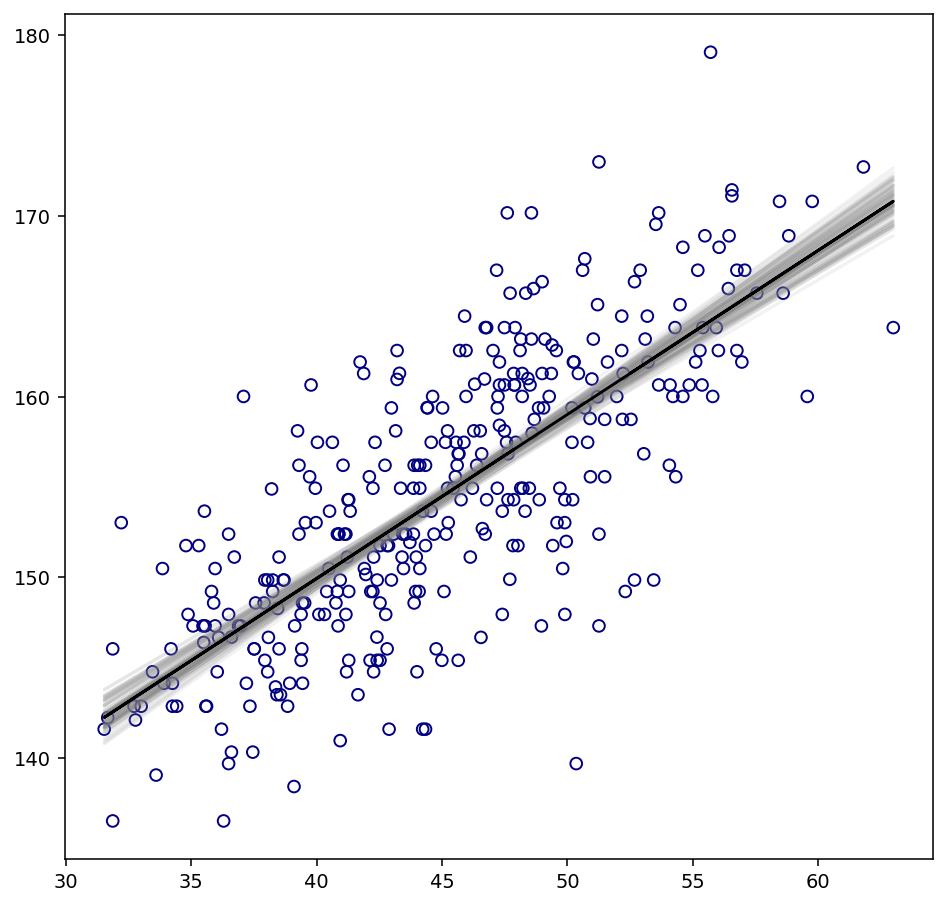

In [124]:
for i in np.arange(100):
    plt.plot(df.weight, fit['alpha'][i] + fit['beta'][i]*(df.weight - np.mean(df.weight)), color = 'gray', alpha=0.1)
plt.plot(df.weight, np.mean(fit['alpha']) + np.mean(fit['beta'])*(df.weight - np.mean(df.weight)), color = 'black')    

plt.scatter(df.weight, df.height, marker='o', facecolors='none', edgecolors='navy')

In [105]:
fit

Inference for Stan model: anon_model_95ce58ef7442926ff2ed78a7695669ef.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha 154.53  6.4e-3   0.27 153.98 154.35 154.53 154.71 155.07   1842    1.0
beta    0.91  9.5e-4   0.04   0.83   0.88   0.91   0.94   0.99   1969    1.0
sigma   5.14  4.4e-3    0.2   4.76    5.0   5.13   5.27   5.54   2069    1.0
lp__  -856.8    0.04   1.23 -860.0 -857.3 -856.5 -855.9 -855.4   1176    1.0

Samples were drawn using NUTS at Sat May  2 16:51:49 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).